In [75]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Failure prediction - For model creation.csv")

In [76]:
data=pd.DataFrame(data)
data.drop(['team','provider'],axis=1)

,Random,Machine nbr,lifetime,broken,pressureInd,moistureInd,temperatureInd
0,0.437420,723,60,Yes,77.836105,112.832544,121.786371
1,0.688345,107,88,Yes,89.350620,95.228125,99.082317
2,0.805670,153,30,No,130.089477,96.367747,103.608344
3,0.923187,140,79,Yes,87.421990,110.941574,129.691510
4,0.036583,359,2,No,69.939898,86.292387,91.861983
5,0.716907,10,81,Yes,97.501826,92.228039,80.800159
6,0.264124,20,11,No,166.785898,97.244213,89.585687
7,0.650043,542,62,No,94.415823,95.073117,107.696747
8,0.636112,156,27,No,102.676658,88.963203,102.979857
9,0.906825,324,52,No,93.099811,103.466191,71.497776


In [77]:
data[(data['broken']=='No') & (data['lifetime'] >=60)].count()

Random            96
Machine nbr       96
lifetime          96
broken            96
pressureInd       96
moistureInd       96
temperatureInd    96
team              96
provider          96
dtype: int64

In [78]:
data[(data['broken']=='Yes') & (data['lifetime'] >= 60)].count()

Random            278
Machine nbr       278
lifetime          278
broken            278
pressureInd       278
moistureInd       278
temperatureInd    278
team              278
provider          278
dtype: int64

In [14]:
feature_names=['Random','Machine nbr','lifetime','temperatureInd','moistureInd','pressureInd']
X=data[feature_names]
y=data.broken

In [51]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

/home/ksolves/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ksolves/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ksolves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


accuracy is 0.919047619047619 


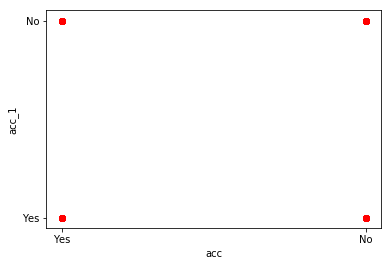

In [47]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
#precision=precision_score(y_test,y_pred)
#recall=recall_score(y_test,y_pred)
print("accuracy is {} ".format(accuracy))


[[121   9]
 [  8  72]]


Text(0.5, 257.44, 'Predicted label')

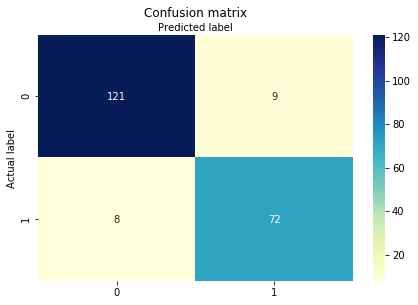

In [52]:
cnf_matrix =confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')